# Passi preliminari prima dell'esperienza

Si procede inizialmente a verificare che Analog Discovery 2 sia funzionante (e anche per impratichirsi nell'usare il modulo tdwf), pertanto abbiamo scritto il seguente script che genera un segnale costante e poi sinusoidale (iniziamo con quello costante). Successivamente vedremo che cosa accade cortocircuitando *Ch1/+* e *Ch1/-* oppure toccando *Ch1/+* con un dito e, infinie, procederemo come annunciato nell'effettuare la misura del segnale in uscita da un resistore. <br>
**Nota**: si è aggiunto un delay fra la generazione della forma d'onda e il sampling per evitare di misurare il transiente in cui il segnale non è costante oppure non ha forma sinusoidale.

<>:32: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
C:\Users\franc\AppData\Local\Temp\ipykernel_9888\2829340856.py:32: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta V$[V]")


Dispositivo #1 [SN:210321B1F388, hdwf=1] connesso!
Configurazione #1


Text(0, 0.5, '$\\Delta V$[V]')

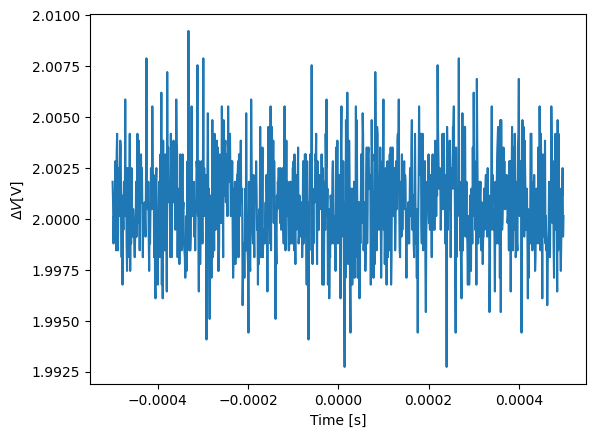

In [ ]:
import tdwf
import matplotlib.pyplot as plt
import numpy as np
import time

### Inizializzazioni
ad2 = tdwf.AD2() # dichiarazione dell'analog discovery 2
scope = tdwf.Scope(ad2.hdwf) # inizializzazione dell'oscilloscopio
wgen = tdwf.WaveGen(ad2.hdwf) # inizializzazione del generatore di funzioni

### Settings del generatore di funzioni
wgen.w1.offs = 2 # offset dell'onda generata
wgen.w1.func = tdwf.funcDC # tipo di segnale generato

### Inizio generazione segnale
wgen.w1.start()

### Setting dell'oscilloscopio
scope.fs = 1e6 # frequenza a cui plotta
scope.npt = 1000 # numero di punti memorizzati
scope.ch1.rng=5 # definisco il range (mi definisce anche la risoluzione minima su y = max/bit)

### Inizio sampling
time.sleep(0.5) # si aspetta mezzo secondo per assicurare di non misurare il transiente in cui il segnale non è costante
scope.sample() # inizia il sampling
data = np.column_stack((scope.time.vals, scope.ch1.vals)) 
np.savetxt("misura01.txt", data, delimiter="\t")
### Plotting
plt.title("")
plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Time [s]")
plt.ylabel("$\Delta V$[V]")

Si osserva ora l'onda sinusoidale che generiamo col codice sopra.

In [ ]:
import tdwf
import matplotlib.pyplot as plt
import numpy as np
import time

### Inizializzazioni
ad2 = tdwf.AD2() # dichiarazione dell'analog discovery 2
scope = tdwf.Scope(ad2.hdwf) # inizializzazione dell'oscilloscopio
wgen = tdwf.WaveGen(ad2.hdwf) # inizializzazione del generatore di funzioni

### Settings del generatore di funzioni
wgen.w1.offs = 0 # offset dell'onda generata
wgen.w1.func = tdwf.funcSine # tipo di segnale generato

### Inizio generazione segnale
wgen.w1.start()

### Setting dell'oscilloscopio
scope.fs = 1e6 # frequenza a cui plotta
scope.npt = 8192 # numero di punti memorizzati
scope.ch1.rng=5 # definisco il range (mi definisce anche la risoluzione minima su y = max/bit)

### Inizio sampling
time.sleep(0.5) # si aspetta mezzo secondo per assicurare di non misurare il transiente in cui il segnale non è costante
scope.sample() # inizia il sampling
data = np.column_stack((scope.time.vals, scope.ch1.vals)) 
np.savetxt("misura02.txt", data, delimiter="\t")
# Plotting
plt.title("")
plt.plot(scope.time.vals, scope.ch1.vals, grid=True, label="Segnale mis.")
data = np.loadtxt("misura02.txt", delimiter="\t", unpack=True)
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("$\Delta V$[V]")

<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\D'
C:\Users\franc\AppData\Local\Temp\ipykernel_13152\338935565.py:36: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta V$[V]")


Text(0, 0.5, '$\\Delta V$[V]')

Il segnale risulta discretizzato: sappiamo che l'ADC è a 14 bit, pertanto risulta che la risoluzione lungo l'asse delle ordinate è pari a
$$
    \Delta V = \frac{2 \cdot \text{rng}}{2^{14}} \approx 0.3 \text{ mV},
$$
dove il motivo della dipendenza da *rng* sta nel fatto che lo strumento deve mappare tutto questo intervallo su tutti i livelli discreti che riesce a misurare (pari in numero a $2^{14}$). Il passo non dipende invece da *avg*: infatti lo strumento continuerà sempre ad acquisire a $100 \frac{\text{MSa}}{\text{s}}$, indipendentemente dalla *f* che viene passata.  
Si procede nell'esecuzione della *Task 3*: 
1) cortocircuitare *Ch1/+* e *Ch1/-*, aspettandoci di misurare dei valori prossimi a zero;
2) lasciare *Ch1/+* flottante e toccarlo col dito.

<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
C:\Users\franc\AppData\Local\Temp\ipykernel_9888\2637570905.py:24: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta V$[V]")


Dispositivo #1 [SN:210321B1F388, hdwf=1] connesso!
Configurazione #1


Text(0, 0.5, '$\\Delta V$[V]')

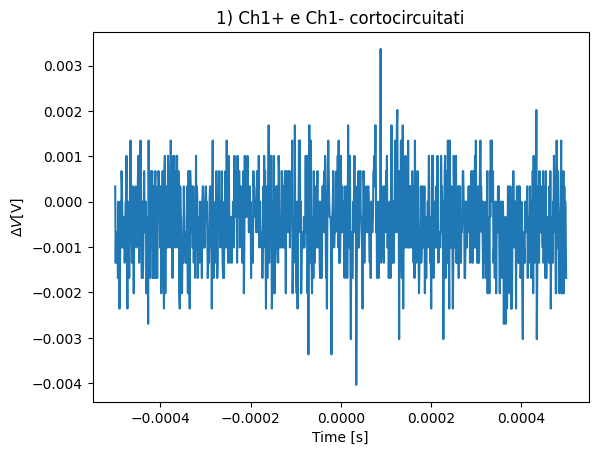

In [ ]:
import tdwf
import matplotlib.pyplot as plt
import numpy as np
import time

### Inizializzazioni
ad2 = tdwf.AD2() # dichiarazione dell'analog discovery 2
scope = tdwf.Scope(ad2.hdwf) # inizializzazione dell'oscilloscopio

### Setting dell'oscilloscopio
scope.fs = 1e6 # frequenza a cui plotta
scope.npt = 1000 # numero di punti memorizzati
scope.ch1.rng=5 # definisco il range (mi definisce anche la risoluzione minima su y = max/bit)

### Inizio sampling
time.sleep(0.5) # non serve ma non cambia niente
scope.sample() # inizia il sampling
data = np.column_stack((scope.time.vals, scope.ch1.vals)) 
np.savetxt("misura03.txt", data, delimiter="\t") 
### Plotting
plt.title("1) Ch1+ e Ch1- cortocircuitati")
plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Time [s]")
plt.ylabel("$\Delta V$[V]")

<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
C:\Users\franc\AppData\Local\Temp\ipykernel_9888\2047528021.py:24: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta V$[V]")


Dispositivo #1 [SN:210321B1F388, hdwf=1] connesso!
Configurazione #1


Text(0, 0.5, '$\\Delta V$[V]')

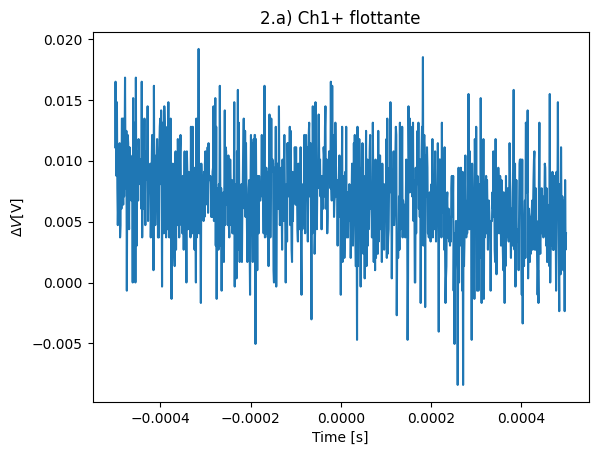

In [ ]:
import tdwf
import matplotlib.pyplot as plt
import numpy as np
import time

### Inizializzazioni
ad2 = tdwf.AD2() # dichiarazione dell'analog discovery 2
scope = tdwf.Scope(ad2.hdwf) # inizializzazione dell'oscilloscopio

### Setting dell'oscilloscopio
scope.fs = 1e6 # frequenza a cui plotta
scope.npt = 1000 # numero di punti memorizzati
scope.ch1.rng=5 # definisco il range (mi definisce anche la risoluzione minima su y = max/bit)

### Inizio sampling
time.sleep(0.5) # non serve ma non cambia niente
scope.sample() # inizia il sampling
data = np.column_stack((scope.time.vals, scope.ch1.vals)) 
np.savetxt("misura04.txt", data, delimiter="\t") 
### Plotting
plt.title("2.a) Ch1+ flottante")
plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Time [s]")
plt.ylabel("$\Delta V$[V]")

<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
C:\Users\franc\AppData\Local\Temp\ipykernel_9888\4168707376.py:24: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta V$[V]")


Dispositivo #1 [SN:210321B1F388, hdwf=1] connesso!
Configurazione #1


Text(0, 0.5, '$\\Delta V$[V]')

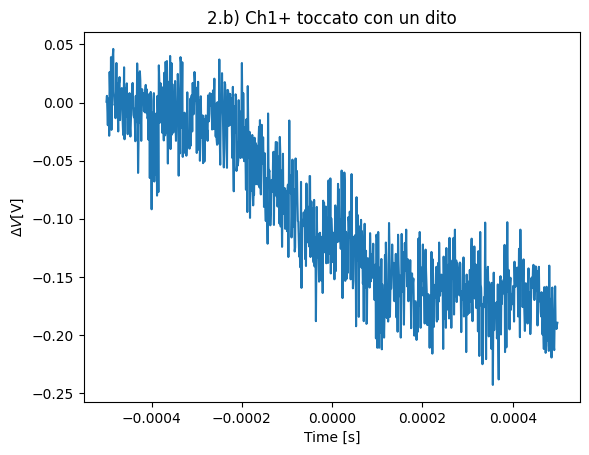

In [ ]:
import tdwf
import matplotlib.pyplot as plt
import numpy as np
import time

### Inizializzazioni
ad2 = tdwf.AD2() # dichiarazione dell'analog discovery 2
scope = tdwf.Scope(ad2.hdwf) # inizializzazione dell'oscilloscopio

### Setting dell'oscilloscopio
scope.fs = 1e6 # frequenza a cui plotta
scope.npt = 1000 # numero di punti memorizzati
scope.ch1.rng=5 # definisco il range (mi definisce anche la risoluzione minima su y = max/bit)

### Inizio sampling
time.sleep(0.5) # non serve ma non cambia niente
scope.sample() # inizia il sampling
data = np.column_stack((scope.time.vals, scope.ch1.vals)) 
np.savetxt("misura04.txt", data, delimiter="\t") 
### Plotting
plt.title("2.b) Ch1+ toccato con un dito")
plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Time [s]")
plt.ylabel("$\Delta V$[V]")